In [1]:
import torch
from torch import nn
from tqdm import tqdm 
import matplotlib
import matplotlib.pyplot as plt
from learned_accept_reject_sampling import * 

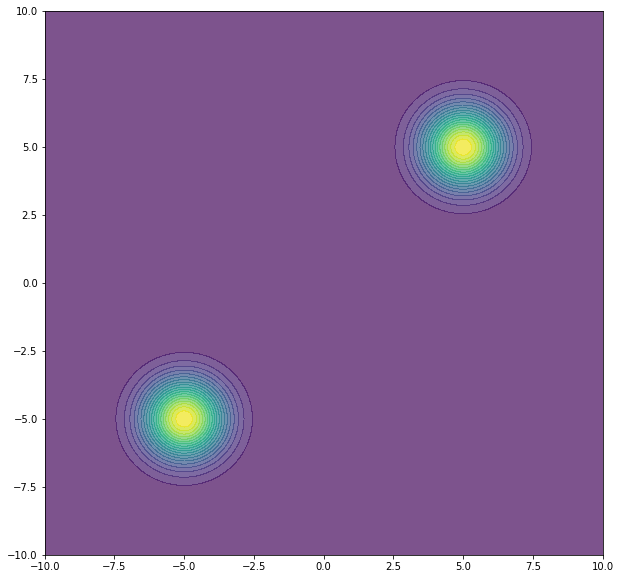

In [2]:
mvn = torch.distributions.MultivariateNormal(torch.tensor([[-5.,-5.],[5.,5.]]), torch.eye(2).unsqueeze(0).repeat(2,1,1))
cat = torch.distributions.Categorical(torch.tensor([.5,.5]))
target = torch.distributions.MixtureSameFamily(cat, mvn)

def plot_2d_function(f, x_min = -10,x_max = 10, y_min = -10, y_max = 10, delta = 50, levels = 2 , alpha = 0.7, new_figure = True):
    with torch.no_grad():
        if new_figure :
            plt.figure(figsize = (10,10))
        tt_x = torch.linspace(x_min, x_max, delta)
        tt_y = torch.linspace(y_min,y_max, delta)
        mesh = torch.cartesian_prod(tt_x, tt_y)
        with torch.no_grad():
            plt.contourf(tt_x,tt_y,f(mesh).numpy().reshape(delta,delta).T, levels = levels, cmap = matplotlib.cm.get_cmap('viridis'), alpha = alpha)
        
plot_2d_function(lambda samples: torch.exp(target.log_prob(samples)),levels = 20, delta = 200)
    

In [3]:
lars_de = LARS_Density_Estimation(target.sample([10000]),[32,32,32])
lars_de.train(100, 10000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.64it/s, loss = 4.134304]


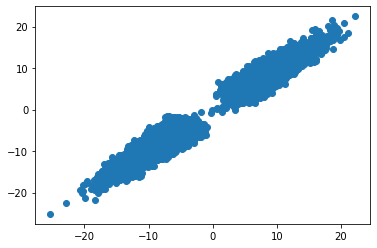

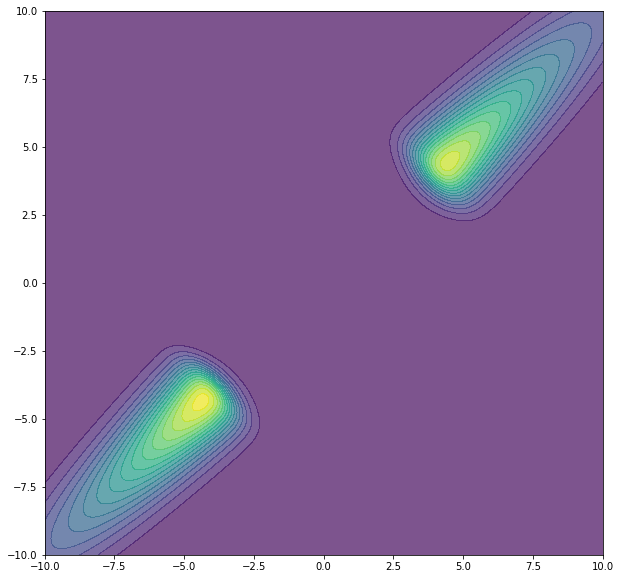

In [4]:
samples = lars_de.sample(100000)
plt.scatter(samples[:,0].numpy(), samples[:,1].numpy())
plot_2d_function(lambda samples :torch.exp(lars_de.log_prob(samples)), levels = 20, delta = 200) 

In [12]:
lars_vi = LARS_Variational_Inference(target.log_prob,2,[132,132,132])
lars_vi.second_train(100)

  6%|███████▊                                                                                                                           | 6/100 [00:05<01:18,  1.20it/s, loss = 14.212321]


KeyboardInterrupt: 

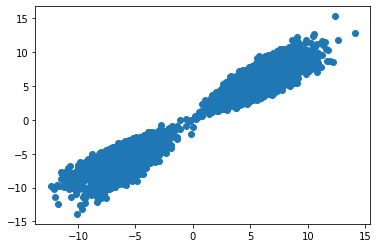

In [10]:
samples = lars_vi.sample(100000)
plt.scatter(samples[:,0], samples[:,1])

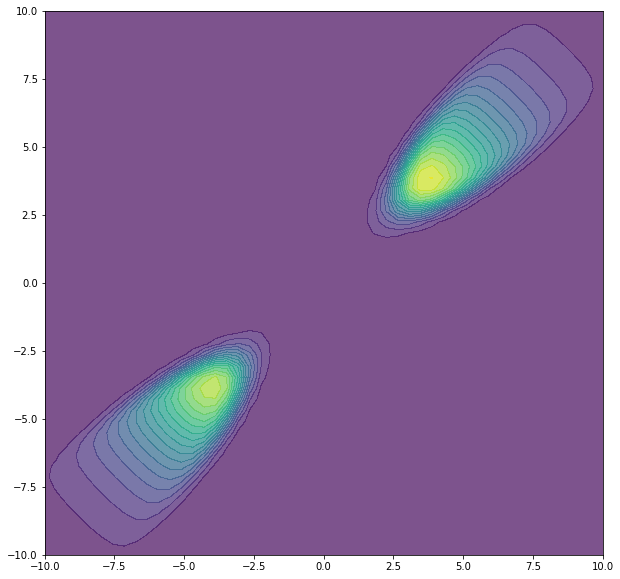

In [11]:
plot_2d_function(lambda samples: torch.exp(lars_vi.log_prob(samples)), levels = 20)

In [ ]:
print(samples.shape)